**Title of Project**
Financial Market News Sentiment Analysis Using Machine Learning

**Objective**
 To analyze the sentiment of financial news articles and predict its impact on the market using a Random Forest model.

Data Source

Dataset: /content/Financial Market News.csv

Import Libary

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

Import Data

In [7]:

df = pd.read_csv('/content/Financial Market News.csv', encoding='latin-1') # Try 'latin-1' encoding



Describe Data

In [8]:
print(df.head())
print(df.info())
print(df.describe())

         Date  Label                                             News 1  \
0  01-01-2010      0           McIlroy's men catch cold from Gudjonsson   
1  02-01-2010      0               Warning from history points to crash   
2  03-01-2010      0      Comment: Why Israel's peaceniks feel betrayed   
3  04-01-2010      1             £750,000-a-goal Weah aims parting shot   
4  05-01-2010      1  Leeds arrive in Turkey to the silence of the fans   

                                       News 2  \
0                       Obituary: Brian Walsh   
1              Investors flee to dollar haven   
2  Court deals blow to seizure of drug assets   
3            Newcastle pay for Fletcher years   
4     One woman's vision offers loan lifeline   

                                            News 3  \
0       Workplace blues leave employers in the red   
1                      Banks and tobacco in favour   
2                       An ideal target for spooks   
3  Brown sent to the stands for Scotla

Data Visualization

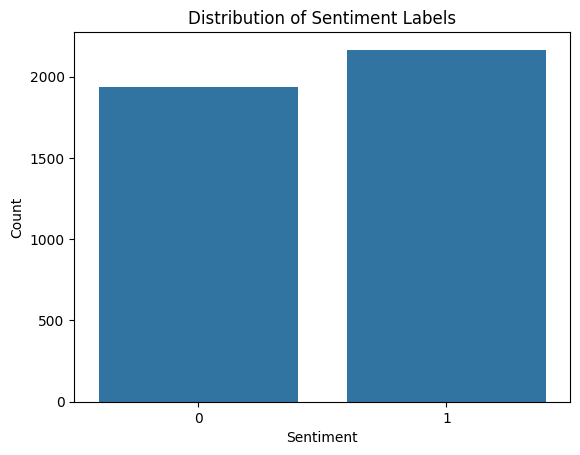

In [9]:


# Visualize the distribution of sentiment labels
sns.countplot(x='Label', data=df)
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


Data Processing

In [11]:
# Handling missing values and text cleaning
df = df.dropna()  # Drop rows with missing values

import re

def clean_text(text):
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

df['cleaned_text'] = df['News 1'].apply(clean_text)

Define Target Variable

In [12]:
X = df['cleaned_text']
y = df['Label']  # Assuming 'Label' contains sentiment labels

In [13]:
# Convert text to numerical features
vectorizer = TfidfVectorizer(max_features=5000)
X_vectorized = vectorizer.fit_transform(X)


In [14]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)


Modeling

In [15]:
# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

MOdel Evalution

In [16]:
y_pred = model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.5097560975609756
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.29      0.37       399
           1       0.52      0.71      0.60       421

    accuracy                           0.51       820
   macro avg       0.50      0.50      0.48       820
weighted avg       0.51      0.51      0.49       820



**Prediction**

In [28]:
# Example Data for Prediction
new_data = [
    "The stock market is experiencing a downturn due to recent economic reports.",
    "Investors are optimistic about the new technology innovations by major companies.",
    "There is uncertainty in the market as geopolitical tensions rise.",
    "Positive earnings reports are driving the market to new highs.",
    "Economic indicators suggest a possible recession in the coming months.",
    "Corporate profits have exceeded expectations, leading to a market rally.",
    "Concerns over inflation are causing volatility in the stock market.",
    "The central bank's decision to lower interest rates has boosted investor confidence."
]

# Clean and Vectorize New Data
new_data_cleaned = [clean_text(text) for text in new_data]
new_data_vectorized = vectorizer.transform(new_data_cleaned)

# Make Predictions
predictions = model.predict(new_data_vectorized)

# Map predictions to sentiment labels
sentiment_labels = {0: 'negative', 1: 'positive'}

# Print News and Predictions
for text, prediction in zip(new_data, predictions):
    print(f"News: {text}")
    print(f"Predicted Sentiment: {sentiment_labels[prediction]}")
    print()


News: The stock market is experiencing a downturn due to recent economic reports.
Predicted Sentiment: negative

News: Investors are optimistic about the new technology innovations by major companies.
Predicted Sentiment: positive

News: There is uncertainty in the market as geopolitical tensions rise.
Predicted Sentiment: positive

News: Positive earnings reports are driving the market to new highs.
Predicted Sentiment: negative

News: Economic indicators suggest a possible recession in the coming months.
Predicted Sentiment: positive

News: Corporate profits have exceeded expectations, leading to a market rally.
Predicted Sentiment: negative

News: Concerns over inflation are causing volatility in the stock market.
Predicted Sentiment: positive

News: The central bank's decision to lower interest rates has boosted investor confidence.
Predicted Sentiment: negative

